In [1]:
import pandas
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
!tail -n 14 ../data/adult.names | awk -F: '{print "\x22"$1"\x22,"}'

"age",
"workclass",
"fnlwgt",
"education",
"education-num",
"marital-status",
"occupation",
"relationship",
"race",
"sex",
"capital-gain",
"capital-loss",
"hours-per-week",
"native-country",


In [10]:
def read_data(n=None):
    colnames = ["age",
"workclass",
"fnlwgt",
"education",
"education-num",
"marital-status",
"occupation",
"relationship",
"race",
"sex",
"capital-gain",
"capital-loss",
"hours-per-week",
"native-country",
"income"]
    df = pandas.read_csv('../data/adult.data.gz', names=colnames)
    if n:
        df = df.sample(n)
        df.index = range(n)
    target = (df['income'] == " >50K")*1
    df.pop('income')
    return df, target

In [11]:
features, target = read_data(2000)

In [12]:
cat_columns = ['sex', 'education', 'race']
cont_columns = ['age', 'education-num']

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [15]:
cat_trans = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])
cont_trans = Pipeline(steps=[('scale', StandardScaler())])

feature_trans = ColumnTransformer(
    transformers=[('categorical', cat_trans, cat_columns),
                 ('continuous', cont_trans, cont_columns)])

classifier = Pipeline(steps=[('feature_tranform', feature_trans),
                             ('classifier', KNeighborsClassifier(n_neighbors=35))])

In [16]:
classifier

Pipeline(steps=[('feature_tranform',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sex', 'education', 'race']),
                                                 ('continuous',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'education-num'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=35))])

In [17]:
from sklearn import set_config
set_config(display='diagram')

In [18]:
classifier

Pipeline(steps=[('feature_tranform',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sex', 'education', 'race']),
                                                 ('continuous',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'education-num'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=35))])

In [19]:
from sklearn.model_selection import cross_val_score

In [27]:
cv_scores = cross_val_score(classifier, features, target, cv=20)

In [32]:
cv_scores

array([0.82, 0.81, 0.83, 0.81, 0.79, 0.79, 0.77, 0.75, 0.83, 0.79, 0.81,
       0.75, 0.77, 0.78, 0.84, 0.78, 0.78, 0.79, 0.8 , 0.74])

In [33]:
cv_scores.mean()

0.7915

(array([3., 2., 7., 4., 4.]),
 array([0.74, 0.76, 0.78, 0.8 , 0.82, 0.84]),
 <BarContainer object of 5 artists>)

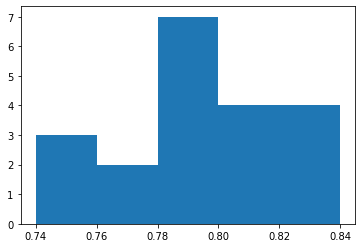

In [34]:
plt.hist(cv_scores, bins=5)

In [29]:
from sklearn.utils import resample

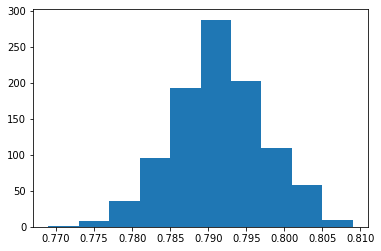

In [35]:
plt.hist([resample(cv_scores).mean() for _ in range(1000)])
None

In [37]:
ks = list(range(10, 100, 10))

In [39]:
score_results = [cross_val_score(Pipeline(steps=[('feature_tranform', feature_trans),
                             ('classifier', KNeighborsClassifier(n_neighbors=k))]), features, target, cv=5)
                for k in ks]

In [40]:
score_results

[array([0.7875, 0.75  , 0.76  , 0.765 , 0.765 ]),
 array([0.805 , 0.7775, 0.79  , 0.7875, 0.7475]),
 array([0.8125, 0.78  , 0.7925, 0.8075, 0.775 ]),
 array([0.8025, 0.79  , 0.7925, 0.7975, 0.765 ]),
 array([0.805 , 0.785 , 0.79  , 0.795 , 0.7575]),
 array([0.81  , 0.7825, 0.795 , 0.7875, 0.75  ]),
 array([0.8075, 0.785 , 0.79  , 0.795 , 0.765 ]),
 array([0.815 , 0.7825, 0.78  , 0.8   , 0.7625]),
 array([0.81  , 0.7875, 0.775 , 0.7975, 0.7675])]

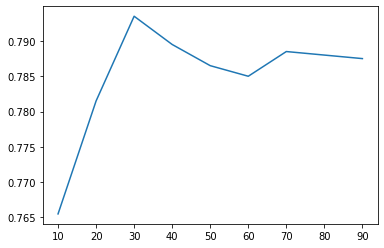

In [41]:
plt.plot(ks, [s.mean() for s in score_results])

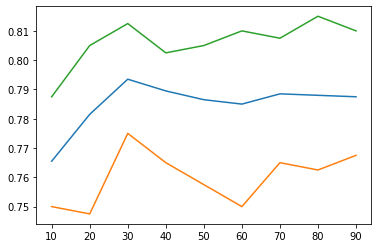

In [42]:
plt.plot(ks, [s.mean() for s in score_results])
plt.plot(ks, [s.min() for s in score_results])
plt.plot(ks, [s.max() for s in score_results])

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {'classifier__n_neighbors': ks}
grid_search = GridSearchCV(classifier, param_grid, cv=10)

In [45]:
fit_result = grid_search.fit(features, target)

In [47]:
fit_result.best_estimator_.get_params()['steps']

[('feature_tranform',
  ColumnTransformer(transformers=[('categorical',
                                   Pipeline(steps=[('onehot',
                                                    OneHotEncoder(drop='first'))]),
                                   ['sex', 'education', 'race']),
                                  ('continuous',
                                   Pipeline(steps=[('scale', StandardScaler())]),
                                   ['age', 'education-num'])])),
 ('classifier', KNeighborsClassifier(n_neighbors=30))]